# Explore here

In [34]:
# import the libraries top use
import numpy as np
import pandas as pd
import seaborn as sns

## Step 1: Problem statement and data collection

We can see the data information in the page <https://insideairbnb.com/new-york-city/> where we can understand that we are seeing a list of homes/apartments, private, shared rooms, and more recently hotel rooms

In [35]:
from utils import load_data 

file_path = '../data/raw/AB_NYC_2019.csv'
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

df = load_data(file_path=file_path, url=url)

Loading data from file: ../data/raw/AB_NYC_2019.csv


### The problem to solve is: we want to predict the value of a house based in some information

## Step 2: Exploration and data cleaning

In [36]:
# see the info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      48895 non-null  int64  
 1   id                              48895 non-null  int64  
 2   name                            48879 non-null  object 
 3   host_id                         48895 non-null  int64  
 4   host_name                       48874 non-null  object 
 5   neighbourhood_group             48895 non-null  object 
 6   neighbourhood                   48895 non-null  object 
 7   latitude                        48895 non-null  float64
 8   longitude                       48895 non-null  float64
 9   room_type                       48895 non-null  object 
 10  price                           48895 non-null  int64  
 11  minimum_nights                  48895 non-null  int64  
 12  number_of_reviews               

In [37]:
# see the first rows
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [38]:
# see the last rows
df.tail()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [39]:
# lets get the shape of the data
print(f"Shape of the data: {df.shape} \n")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Shape of the data: (48895, 17) 

Number of rows: 48895
Number of columns: 17


### Eliminate duplicates

In [40]:
# verify if there are duplicates
duplicates = df.drop("id", axis = 1).duplicated().sum()
print(f'Number of duplicated rows: {duplicates}')

Number of duplicated rows: 0


We do not have duplicates so we do not have to delete any duplicated rows.

### Eliminate irrelevant information

We can eliminate not useful data as [name, host_id, last_review] that cannot be used by the model. We can also delete the categorical data because that is nos useful to use by a regression model, but the exercise we are going to keep it and analyze it.

In [41]:
# drop the id, hast_id column
df.drop(["host_id", "name", "host_name", "last_review"], axis = 1, inplace = True)

In [42]:
# view the data after the delete
df.head()	

,Unnamed: 0,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Impute missing data

Let's see the information of the df

In [43]:
# see the info of the df after the deletes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      48895 non-null  int64  
 1   id                              48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

Let's see if the "reviews_per_month" column shows 0 values

In [44]:
len(df.query(f'`reviews_per_month` == 0'))

0

Because we can see that there are no 0 values we are going to impute the value of 0 to those apartments that does not have reviews.

In [45]:
# put 
df['reviews_per_month'] = df['reviews_per_month'].fillna(value=0)

In [46]:
# see the head, this line is mostly to see the df in Data Wrangler
df.head(15)

,Unnamed: 0,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,6,5121,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,7,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,8,5203,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,9,5238,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [47]:
# see the info of the df after imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      48895 non-null  int64  
 1   id                              48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

## Step 3: Analysis of univariate variables

A univariate variable is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.

### Analysis of categorical variables

A categorical variable is a type of variable that can be one of a limited number of categories or groups. These groups are often nominal (e.g., the color of a car: red, blue, black, etc., but none of these colors is inherently "greater" or "better" than the others) but can also be represented by finite numbers.

To represent these types of variables the best tool are histograms. Before we start plotting, we must identify which ones are categorical, and this can be easily checked by analyzing the range of values. In this case, the categorical variables are "neighbourhood_group", "neighbourhood" and "room_type", so we have a total of 3 columns of categorical data:

In [48]:
# import the libraries
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme()

<Axes: xlabel='neighbourhood_group', ylabel='Count'>

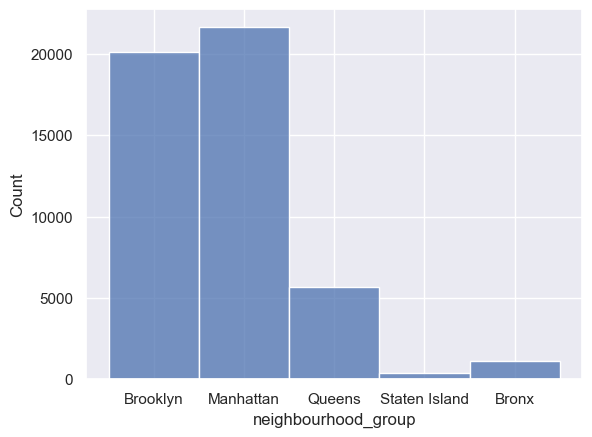

In [49]:
# create the "neighbourhood_group" histogram
sns.histplot(data = df, x = "neighbourhood_group")

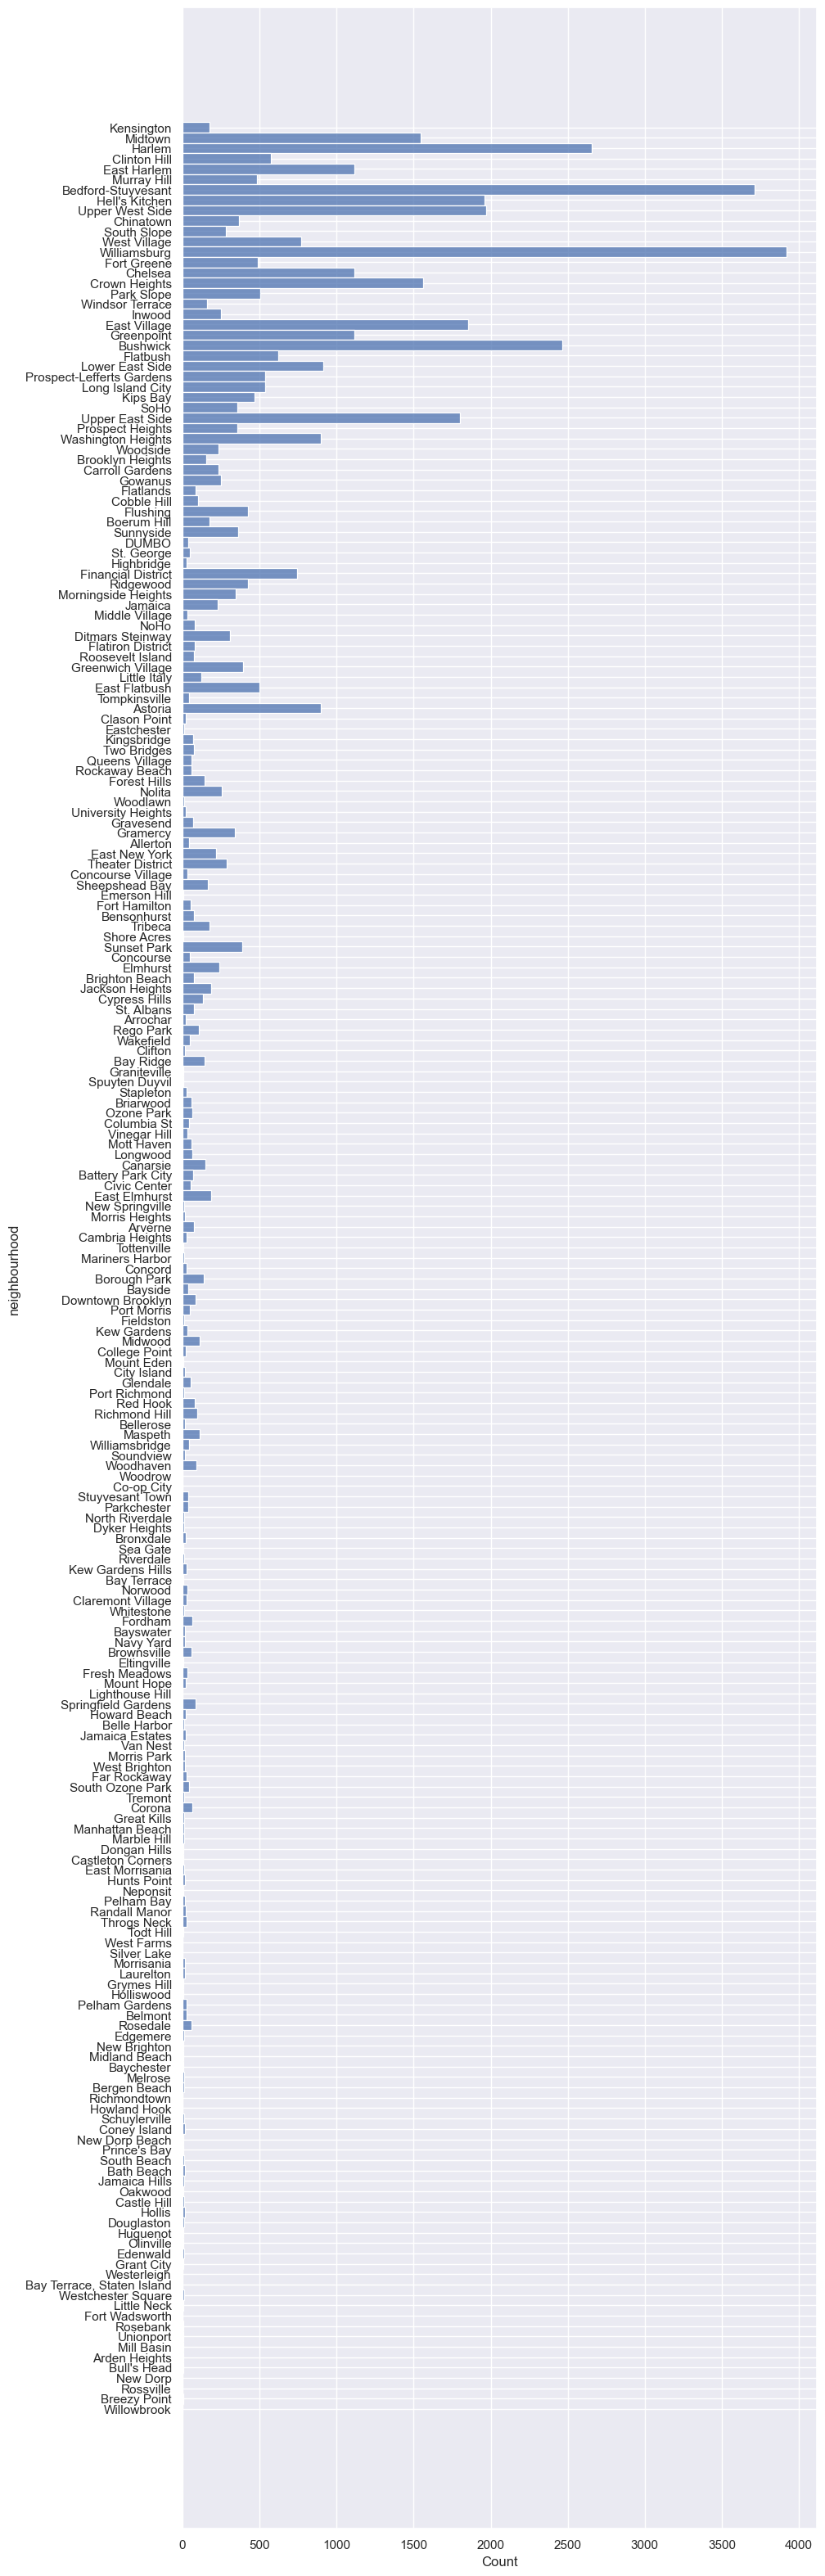

In [50]:
# create the "neighbourhood" histogram
plt.subplots(figsize=(10, 40))
sns.histplot(data = df, y = "neighbourhood")
plt.show()

<Axes: xlabel='room_type', ylabel='Count'>

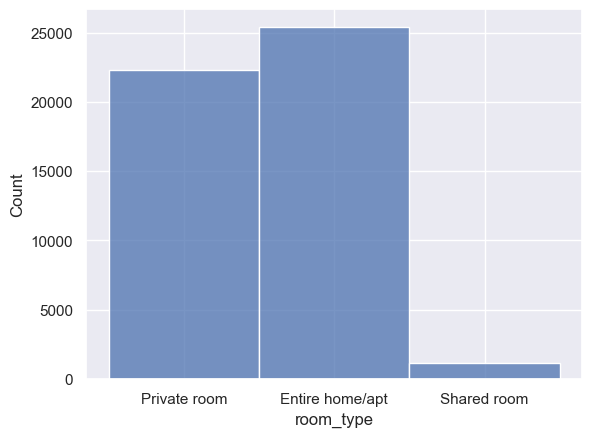

In [51]:
# create the "neighbourhood_group" histogram
sns.histplot(data = df, x = "room_type")

With this histograms we could learn how the data is distributed, so we can say that:

- The majority of the neighbor group are based in "Brooklyn" and "Manhattan"
- The neighborhoods with the largest number of houses/rooms are "Bedford-Stuyvesant", "Harlem", and "Williamsburg".
- The majority of the houses/rooms are of type "Private room" and "Entire home/apt:

### Analysis on numeric variables

A numeric variable is a type of variable that can take numeric values (integers, fractions, decimals, negatives, etc.) in an infinite range. A numerical categorical variable can also be a numerical variable (e.g. for further analysis, we can take the class Survived as numerical also to study relationships). They are usually represented using a histogram and a boxplot, displayed together. 

Before starting to plot, we must also identify which are the numerical ones, which are "latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count" and "availability_365".

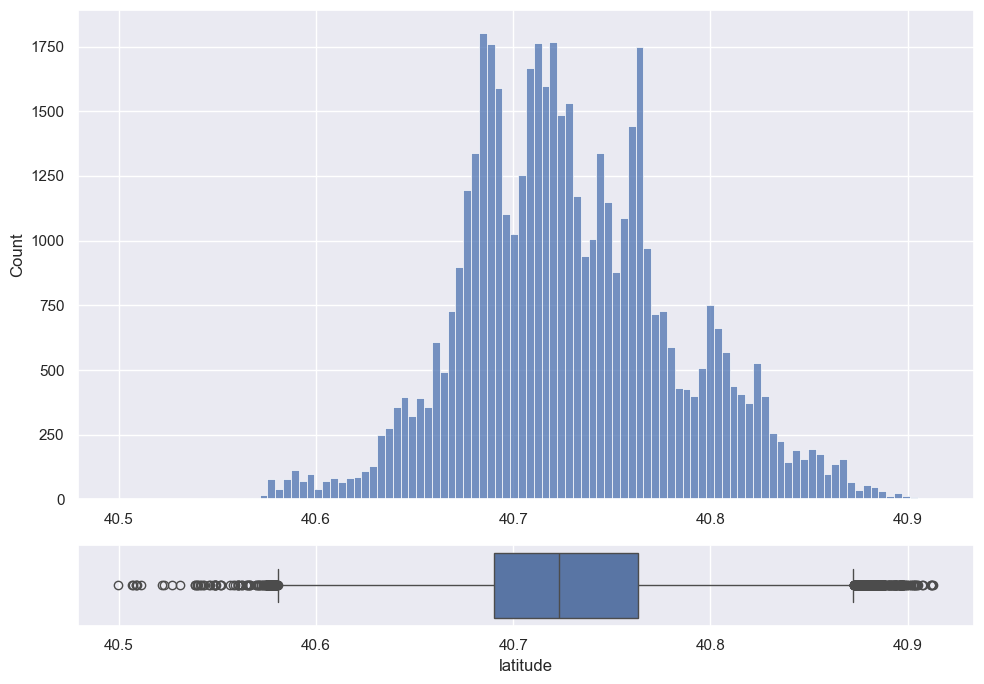

In [52]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# creating a multiple figure with histogram and box plot for latitude
sns.histplot(ax = axis[0], data = df, x = "latitude").set(xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "latitude")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

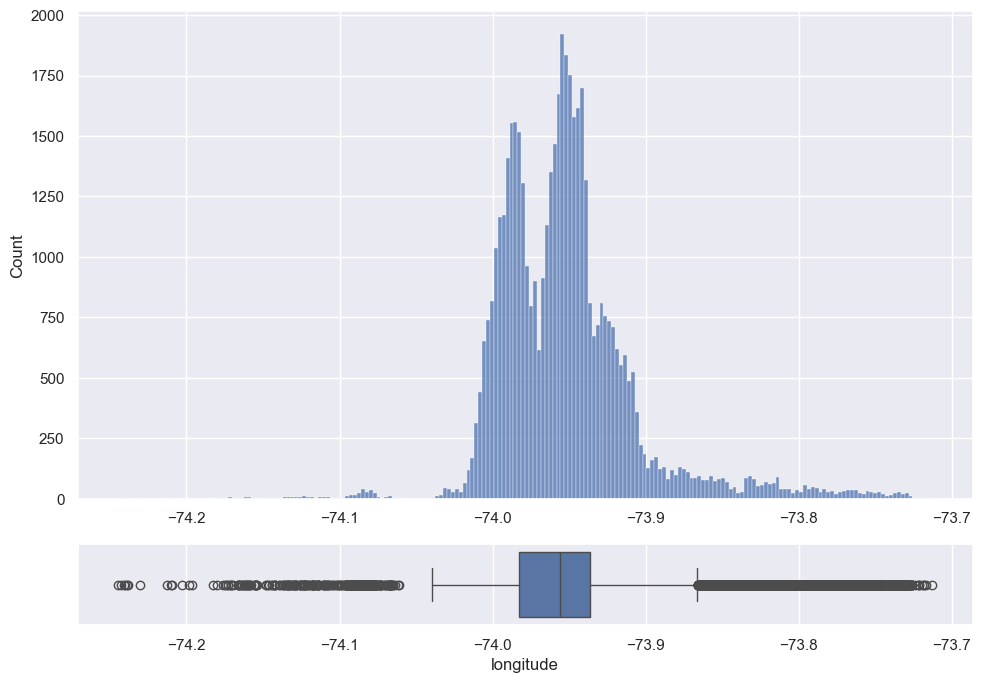

In [53]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# creating a multiple figure with histogram and box plot for longitude
sns.histplot(ax = axis[0], data = df, x = "longitude").set(xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "longitude")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

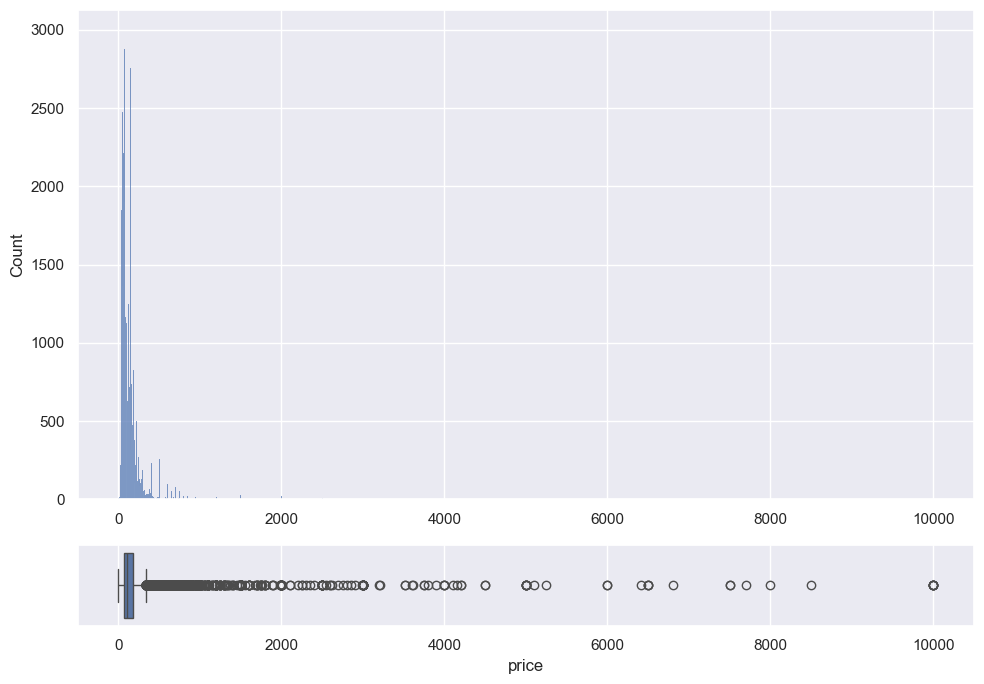

In [54]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# creating a multiple figure with histogram and box plot for price
sns.histplot(ax = axis[0], data = df, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "price")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

We can see that we have many outliers in the price column, more processing of this column is required.

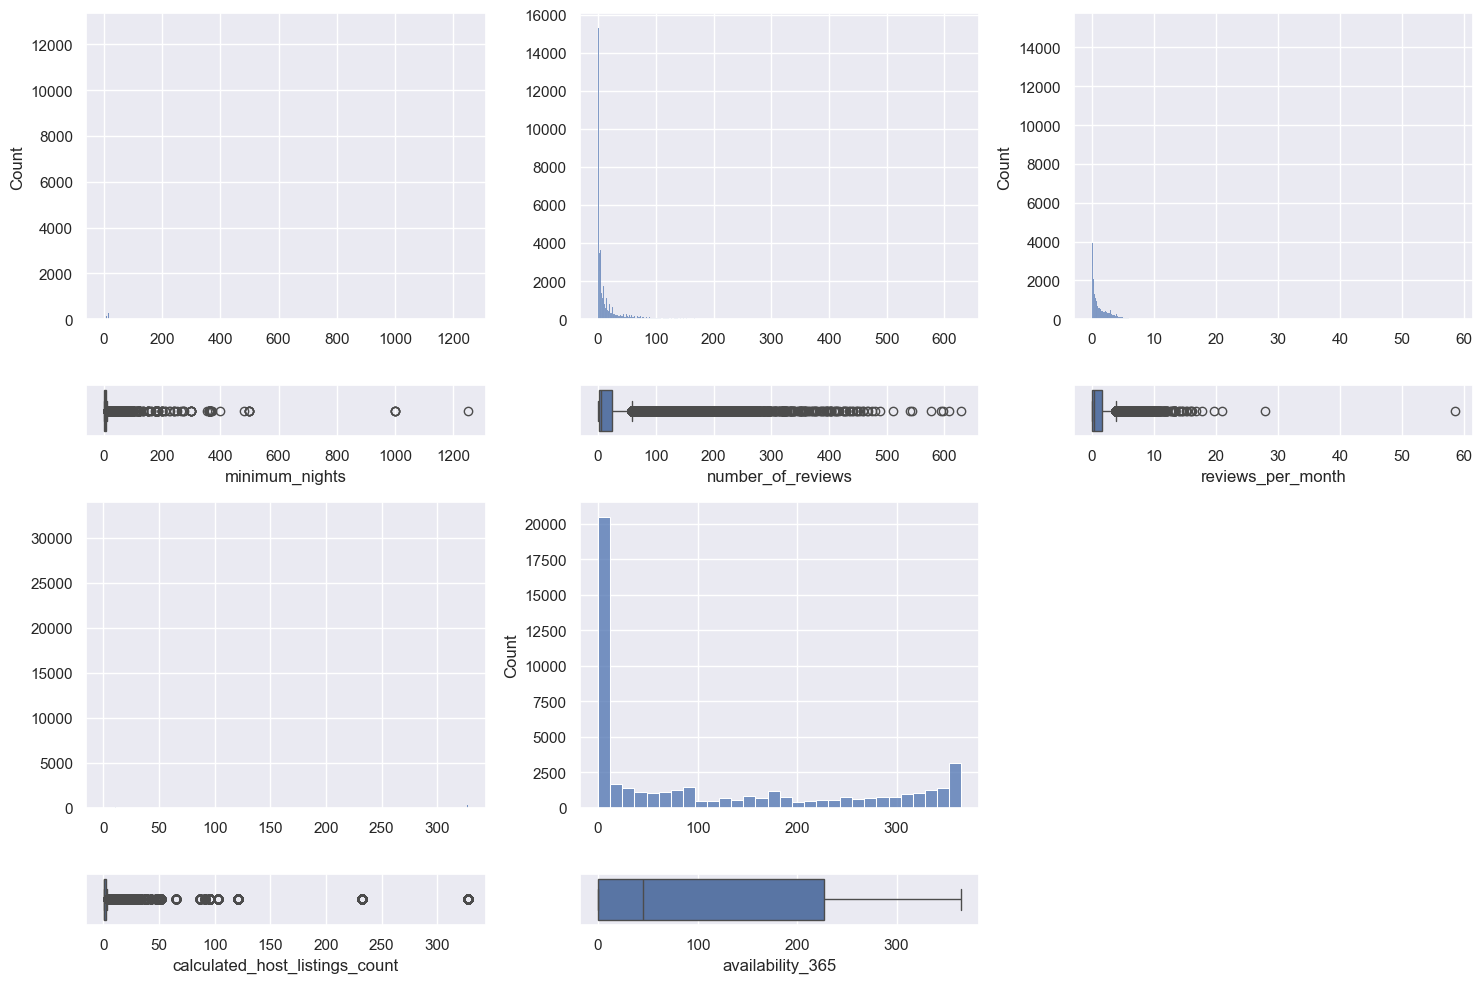

In [63]:
fig, axis = plt.subplots(4, 3, figsize = (15, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# creating a multiple figure with histograms and box plots
# first row
# 	first col
sns.histplot(ax = axis[0, 0], data = df, x = "minimum_nights").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "minimum_nights")
# 	second col
sns.histplot(ax = axis[0, 1], data = df, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "number_of_reviews")
# 	third col
sns.histplot(ax = axis[0, 2], data = df, x = "reviews_per_month").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "reviews_per_month")

# second row
# 	first col
sns.histplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "calculated_host_listings_count")
# 	second col
sns.histplot(ax = axis[2, 1], data = df, x = "availability_365").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "availability_365")
# 	third col, delete this plots
fig.delaxes(axis[2, 2])
fig.delaxes(axis[3, 2])


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Lets graph some values apart to better see the results

array([[<Axes: title={'center': 'minimum_nights'}>]], dtype=object)

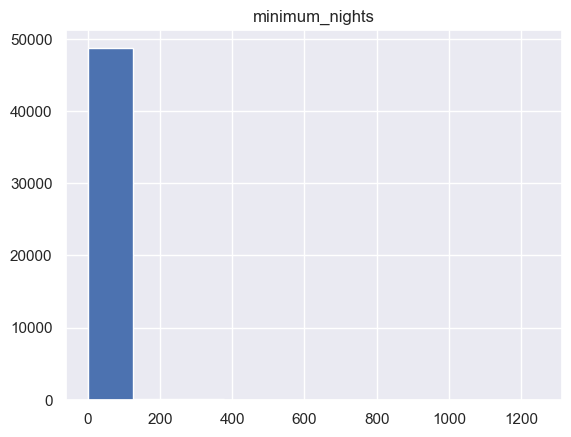

In [56]:
# histogram with pandas to verify the results
df.hist(column='minimum_nights')

With this results we can see that this value does not seem useful for the creation of the model.

array([[<Axes: title={'center': 'reviews_per_month'}>]], dtype=object)

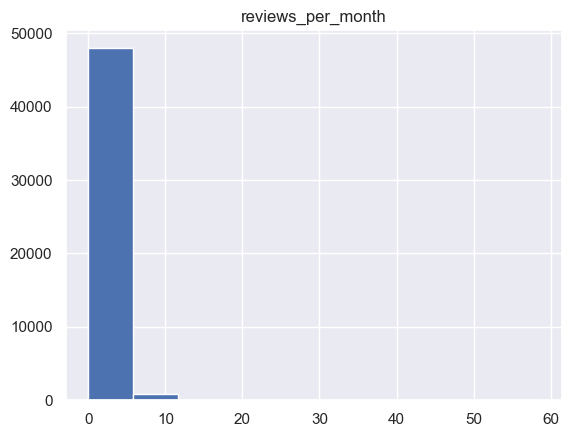

In [64]:
# histogram with pandas to verify the results
df.hist(column='reviews_per_month')

array([[<Axes: title={'center': 'calculated_host_listings_count'}>]],
      dtype=object)

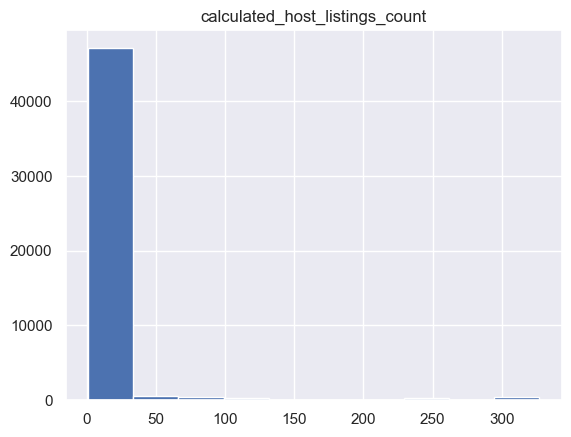

In [65]:
# histogram with pandas to verify the results
df.hist(column='calculated_host_listings_count')

With this we can see that all this columns does not seem very valuable or useful for the model, so we are not going to use them.

## Step 4: Analysis of multivariate variables

After analyzing the characteristics one by one, it is time to analyze them in relation to the predictor and to themselves, in order to draw clearer conclusions about their relationships and to be able to make decisions about their processing.